# Regularized Linear Regression and Bias v.s. Variance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg
from scipy.io import loadmat


In [2]:
# Load data
data = loadmat("ex5data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [3]:
X, y, Xtest, ytest, Xval, yval = data['X'], data['y'], data['Xtest'], data['ytest'], data['Xval'], data['yval']

In [4]:
print("X shape ", X.shape)
print("y shape ", y.shape)
print("Xtest shape ", Xtest.shape)
print("ytest shape ", ytest.shape)
print("Xval shape ", Xval.shape)
print("yval shape ", yval.shape)

X shape  (12, 1)
y shape  (12, 1)
Xtest shape  (21, 1)
ytest shape  (21, 1)
Xval shape  (21, 1)
yval shape  (21, 1)


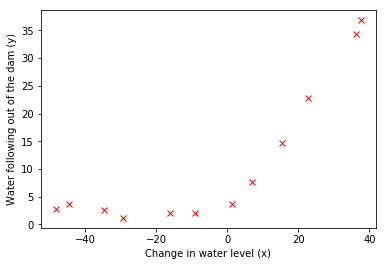

In [5]:
# Plot the data
plt.plot(X, y, 'rx');
plt.xlabel("Change in water level (x)")
plt.ylabel("Water following out of the dam (y)")
plt.show()

In [6]:
def linearRegCostFunction(theta, X, y, lamda):
    m, n = X.shape;
    theta = theta.reshape((n, 1))
    grad = np.zeros(theta.shape);
    h = X.dot(theta);
    J = (1 / (2 *m)) * np.sum(np.square(h - y)) + lamda/(2 * m) * np.sum(np.square(theta[1:,:]));
    return J

def linearRegGradient(theta, X, y, lamda):
    m, n = X.shape;
    theta = theta.reshape((n, 1))
    grad = np.zeros(theta.shape);
    h = X.dot(theta);
    grad = (X.T.dot(h - y))/m;
    grad[1:, :] += (lamda/m) * theta[1:, :];
    return grad.flatten()

def trainLinearReg(X, y, lamda = 0):
    m, n = X.shape;
    initial_theta = np.zeros((n, 1));
    maxIterations = 300;
    theta = fmin_cg(linearRegCostFunction,initial_theta,fprime = linearRegGradient,args=(X,y,lamda), maxiter = maxIterations,disp = 0)
    return theta;

def learningCurve(X, y, Xval, yval, lamda):
    m, n = X.shape;
    error_train = [];
    error_val = [];
    for i in range(1, m):
        theta = trainLinearReg(X[:i, :], y[:i, :], lamda);
        error_train.append(linearRegCostFunction(theta, X[:i, :], y[:i, :], 0));
        error_val.append(linearRegCostFunction(theta, Xval, yval, 0));
    return (error_train, error_val)

In [7]:
X_training = np.c_[np.ones((X.shape[0], 1)), X]

In [8]:
theta = trainLinearReg(X_training, y, 0)

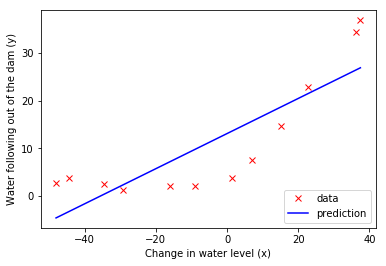

In [9]:
x_min, x_max = np.min(X), np.max(X);
xx = np.linspace(x_min, x_max);
yy = theta[0] + xx * theta[1]
# Plot the data
plt.plot(X, y, 'rx', label="data");
plt.plot(xx, yy, 'b', label="prediction");
plt.xlabel("Change in water level (x)")
plt.ylabel("Water following out of the dam (y)")
plt.legend(loc = 4)
plt.show()

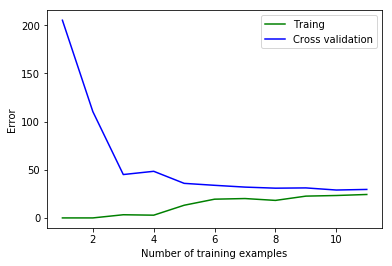

In [10]:
Xval_ = np.c_[np.ones((Xval.shape[0], 1)), Xval];
error_train, error_val = learningCurve(X_training, y, Xval_, yval, 0)
training_set = range(1, X.shape[0]);
plt.plot(training_set, error_train, 'g', label="Traing")
plt.plot(training_set, error_val, 'b', label = "Cross validation")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend(loc = 1)
plt.show()

## Feature Mapping for Polynomial Regression

In [11]:
# Polynomial degree
p = 8;

def polyFeatures(X, p):
    # X_poly = X;
    # for i in range(2, p + 1):
    #     X_poly = np.c_[X_poly, np.power(X, i)]
    # return X_poly

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma

    return X_norm, mu, sigma

def plotFit(min_x, max_x, mu, sigma, theta, p):
    x = np.array(np.arange(min_x - 15, max_x + 25, 0.05)) # 1D vector
    print(x.shape)

    # Map the X values 
    X_poly = polyFeatures(x, p)
    X_poly = X_poly - mu
    X_poly = X_poly/sigma

    # Add ones
    X_poly = np.c_[np.ones((x.shape[0],1)), X_poly]

    # Plot
    plt.plot(x, np.dot(X_poly, theta), '--', label = "Polynomial fit", linewidth=2)

In [12]:
X_poly = polyFeatures(X, p);
X_poly, mu, sigma = featureNormalize(X_poly);
X_poly = np.c_[np.ones((X_poly.shape[0], 1)), X_poly];

X_poly_test = polyFeatures(Xtest, p);
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.c_[np.ones((X_poly_test.shape[0], 1)), X_poly_test];

X_poly_val = polyFeatures(Xval, p);
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.c_[np.ones((X_poly_val.shape[0], 1)), X_poly_val];

(2512,)


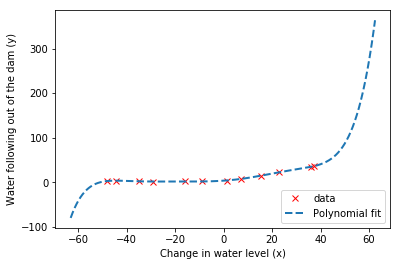

In [13]:
lamda = 0;
theta = trainLinearReg(X_poly, y, lamda);

x_min, x_max = np.min(X), np.max(X);
# Plot the data
plt.plot(X, y, 'rx', label="data");
# plt.plot(xx, yy, 'b', label="prediction");
plotFit(x_min, x_max, mu, sigma, theta, p);
plt.xlabel("Change in water level (x)")
plt.ylabel("Water following out of the dam (y)")
plt.legend(loc = 4)
plt.show()

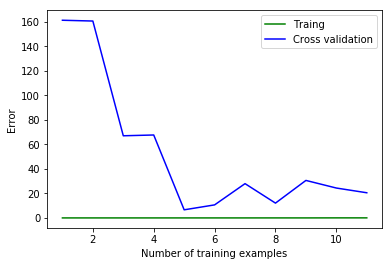

In [14]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lamda)
training_set = range(1, X.shape[0]);
plt.plot(training_set, error_train, 'g', label="Traing")
plt.plot(training_set, error_val, 'b', label = "Cross validation")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend(loc = 1)
plt.show()